In [15]:
import jax
import jax.numpy as jnp
from jax.scipy.linalg import solve
from jax import config; config.update("jax_enable_x64", True)
import matplotlib.pyplot as plt
import matplotlib.tri as tri

from fem import generate_mesh

nx, ny = 5, 5
x_min, x_max = 0.0, 1.0
y_min, y_max = 0.0, 1.0
coords, elements = generate_mesh(nx, ny, x_min, x_max, y_min, y_max)

fun = lambda x, y: x+y
u   = fun(coords[:,0], coords[:,1]) 

u


Array([0.  , 0.25, 0.5 , 0.75, 1.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 0.5 ,
       0.75, 1.  , 1.25, 1.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 1.  , 1.25,
       1.5 , 1.75, 2.  ], dtype=float64)

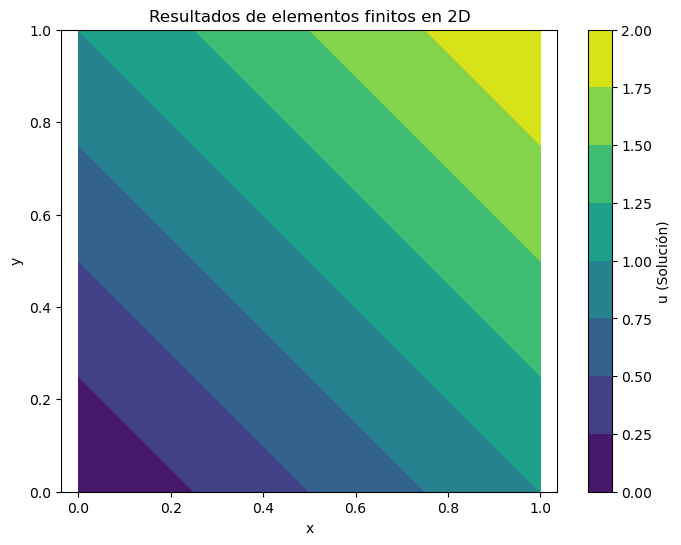

In [16]:
# Crear el triángulo para el trazado
triangulation = tri.Triangulation(coords[:, 0], coords[:, 1])

# Graficar el resultado
plt.figure(figsize=(8, 6))
plt.tricontourf(triangulation, u, cmap='viridis')
plt.colorbar(label='u (Solución)')
plt.title('Resultados de elementos finitos en 2D')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')  # Mantener proporciones
plt.show()

In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import os

os.environ["KERAS_BACKEND"] = "jax"

import keras
from Laplace_JAXSparse2D import solve_and_loss, solve

from PINN2D_keras_sparse import make_model, make_loss_model

# Set the random seed
np.random.seed(1234)
keras.utils.set_random_seed(1234)

dtype='float64' # double precision set to default in the SCR functions
jax.config.update("jax_enable_x64", True)
keras.backend.set_floatx(dtype)

# Number of neurons per hidden layer in the neural network
nn = int(2 * 2**5) # Two times the number of neurons 

# Number of training iterations
iterations = 1

# Initialize the neural network model for the approximate solution
model = make_model(nn)

init_nodes = model(jnp.array([1]))

In [ ]:
def softmax_nodes(params):
    n_nodes = params.shape[1]
    # Compute the softmax values
    softmax_values = jax.nn.softmax(params)

    # Compute the cumulative sum of the softmax values in X axis
    cumulative_sum_x = jnp.cumsum(softmax_values[0, 0:int(n_nodes/2)])
    cumulative_sum_x_with_zero = jnp.insert(cumulative_sum_x, 0, 0)

    # Compute the cumulative sum of the softmax values in Y axis
    cumulative_sum_y = jnp.cumsum(softmax_values[0, int(n_nodes/2):])
    cumulative_sum_y_with_zero = jnp.insert(cumulative_sum_y, 0, 0)

    return cumulative_sum_x_with_zero, cumulative_sum_y_with_zero



(32,)